## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

c:\Users\dibajs1\Miniconda3\envs\NNA\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [48]:
df=pd.read_csv('DATA\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Check missing data    # df.isnull().sum()
#sns.distplot(df['price'])
#sns.countplot(df['bedrooms'])

In [49]:
#df.corr()['price'].sort_values()

In [23]:
#plt.figure(figsize=(12,6))
#sns.scatterplot(x='price', y='sqft_living', data=df)

In [24]:
#plt.figure(figsize=(10,5))
#sns.boxplot(x='bedrooms', y='price', data=df)

In [30]:
#plt.figure(figsize=(10,5))
#sns.scatterplot(x='price', y='long', data=df)

#plt.figure(figsize=(10,5))
#sns.scatterplot(x='price', y='lat', data=df)

In [37]:
non_top_1_perc=df.sort_values(by=['price'], ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

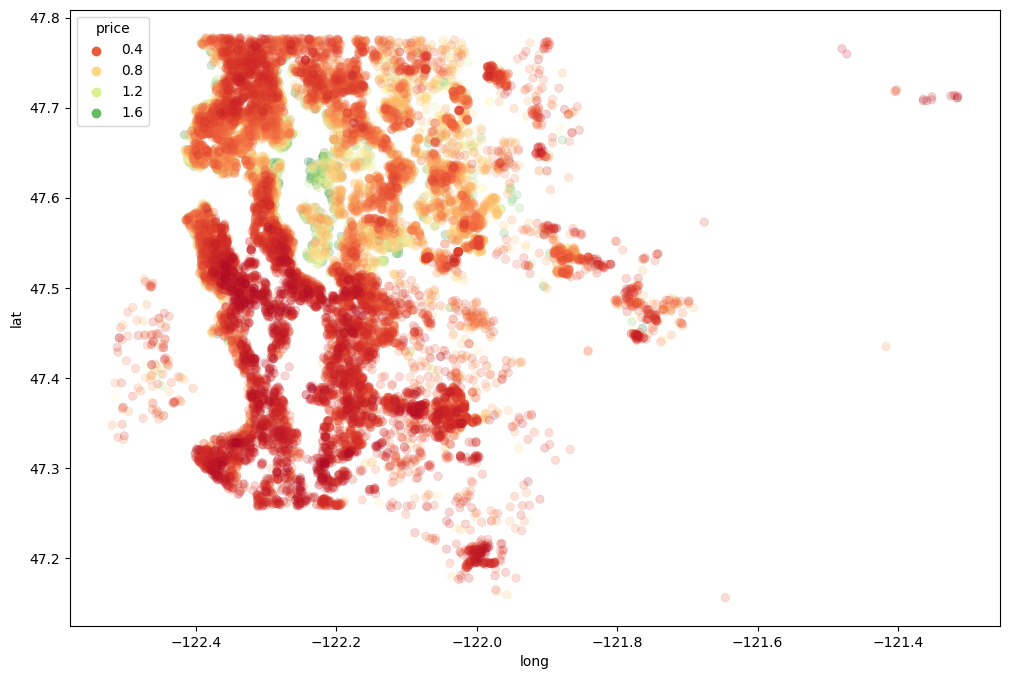

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, hue='price', edgecolor=None, alpha=0.2, palette='RdYlGn')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

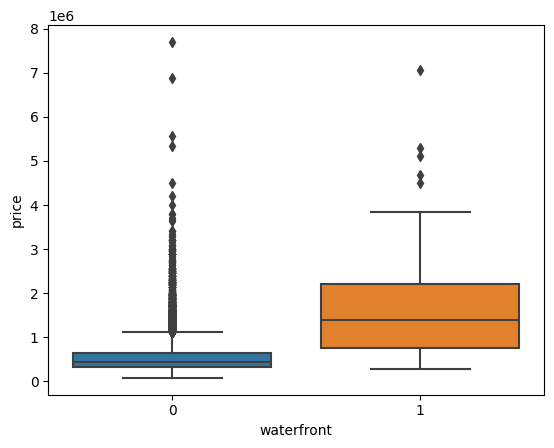

In [39]:
# When you are on a waterfront, your house tends to be more expensive
sns.boxplot(x='waterfront', y='price', data=df)

In [50]:
df=df.drop('id', axis=1)
df['date']=pd.to_datetime(df['date'])

In [58]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month

In [59]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [62]:
df.corr()['price'].sort_values()

zipcode         -0.053402
month           -0.009928
year             0.003727
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

In [73]:
#plt.figure(figsize=(10,5))
#sns.boxplot(x='month', y='price', data=df)

In [72]:
#df.groupby('month').mean()['price'].plot()

In [74]:
df=df.drop('date', axis=1)

In [75]:
df=df.drop('zipcode', axis=1)

In [80]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [81]:
X=df.drop('price', axis=1).values
y=df['price'].values

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler=MinMaxScaler()

In [87]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [90]:
X_train.shape

(15117, 19)

In [130]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# Final output node for prediction
model.add(Dense(1))
# For a mean squared error regression problem
#model.compile(optimizer='adam', loss='mse')
model.compile(optimizer='adam',loss='mse')

In [92]:
model.fit(x=X_train,y=y_train,validation_data=(X_test, y_test), batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 6ms/step - loss: 430249213952.0000 - val_loss: 418970304512.0000
Epoch 2/400
119/119 [==============================] - 0s 4ms/step - loss: 429957382144.0000 - val_loss: 417940340736.0000
Epoch 3/400
119/119 [==============================] - 1s 4ms/step - loss: 425624600576.0000 - val_loss: 407623303168.0000
Epoch 4/400
119/119 [==============================] - 1s 5ms/step - loss: 400119791616.0000 - val_loss: 361020162048.0000
Epoch 5/400
119/119 [==============================] - 1s 5ms/step - loss: 321898807296.0000 - val_loss: 251706310656.0000
Epoch 6/400
119/119 [==============================] - 1s 5ms/step - loss: 195976462336.0000 - val_loss: 132708048896.0000
Epoch 7/400
119/119 [==============================] - 1s 4ms/step - loss: 112964820992.0000 - val_loss: 96892583936.0000
Epoch 8/400
119/119 [==============================] - 0s 4ms/step - loss: 98847039488.0000 - val_loss: 94652882944.0000
Epoch 9/400
119/119

In [95]:
# Comparing the loss on training data with the loss on validation data
losses= pd.DataFrame(model.history.history)

<AxesSubplot:>

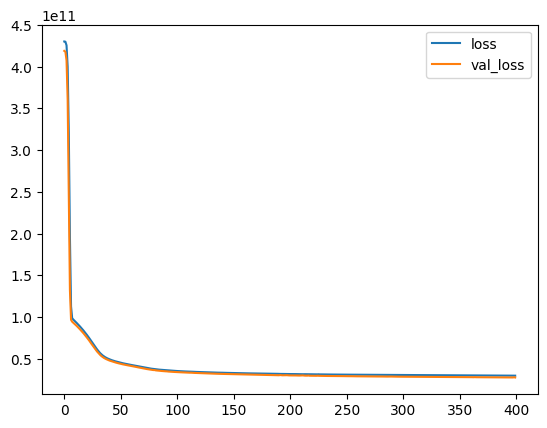

In [96]:
losses.plot()
# if the orange cal_loss started to increase after some epochs, it means that we are overfitting the data.

# Evaluation on Test Data

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
predictions= model.predict(X_test)

203/203 [==============================] - 0s 995us/step


In [109]:
print('Mean squared error', mean_squared_error(y_test, predictions))
print('Root mean squared error', np.sqrt(mean_squared_error(y_test, predictions)))
print('Mean absolute error', mean_absolute_error(y_test, predictions))
print('Explained variance score', explained_variance_score(y_test, predictions))

Mean squared error 27870761225.326973
Root mean squared error 166945.38395932657
Mean absolute error 102475.03030237269
Explained variance score 0.7898396366297731


In [105]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

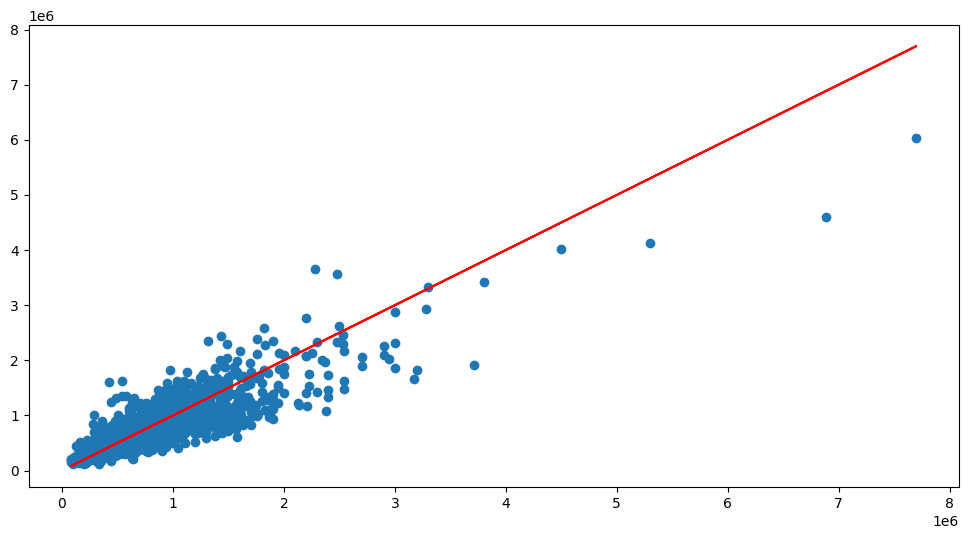

In [112]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, color='red')

Our model works well on the houses with prices up to 2.5-3 million dollars. It is better if we drop 1-2% of our higher values or continue fitting the model without overfitting to get better results. Well done!

In [124]:
#single_house=df.drop(['price'], axis=1).iloc[0]

In [125]:
#single_house.values.reshape(-1,19)
# in the reshape function, -1 means keep those all dimentions along that axis

In [126]:
#single_house=scaler.transform(single_house.values.reshape(-1,19))

In [127]:
#single_house

In [128]:
#model.predict(single_house)

In [129]:
#df.head(1)